## Notebook 3 : Correlations and relationship between variables

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


In [ ]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_rv = pd.read_csv('df_complete.csv')

df_rv.head()

C:\Users\Ilian\AppData\Local\Temp\ipykernel_74964\2174705646.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rv = pd.read_csv('df_complete.csv')


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


C:\Users\Ilian\AppData\Local\Temp\ipykernel_74964\2174705646.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rv = pd.read_csv('df_complete.csv')


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [4]:
#### CONVERTS TO THE RIGHT TYPE ####

category_convert = ['Nature mutation', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Code type local', 'Type local']
df_rv[category_convert] = df_rv[category_convert].astype('category')

df_rv['Date mutation'] = pd.to_datetime(df_rv['Date mutation'], errors = 'coerce')
df_rv['Date mutation'] = df_rv['Date mutation'].interpolate(method='linear')

df_rv['Valeur fonciere']=df_rv['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_rv['Valeur fonciere']=pd.to_numeric(df_rv['Valeur fonciere'], errors='coerce')

df_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810875 entries, 0 to 17810874
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Voie                       category      
 4   Code postal                category      
 5   Commune                    category      
 6   Code departement           category      
 7   Code commune               category      
 8   Nombre de lots             int64         
 9   Code type local            category      
 10  Type local                 category      
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  float64       
 13  Surface terrain            float64       
 14  annee                      int64         
dtypes: category(8), datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 GB


In [5]:
#### CHECK MISSING VALUES ####
df_rv.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
annee                        0
dtype: int64

In [6]:
#### CHECK DUPLICATES ####
#df_rv.drop_duplicates(keep='last', inplace=True)
df_rv.duplicated().sum()

0

In [7]:
df_rv.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze correlations between various variables (price vs. surface area, price vs. number of rooms, etc.).
- Study how certain factors (terrain size, property type) affect property values.

In [ ]:
#### LIBRARIES ####
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection



Simple comparaison
- Analyse price vs area
- Analyse price vs number of rooms
- Analyse price vs type 

Comparaison croisé

Analyse price in function of the type of local

<function matplotlib.pyplot.show(close=None, block=None)>

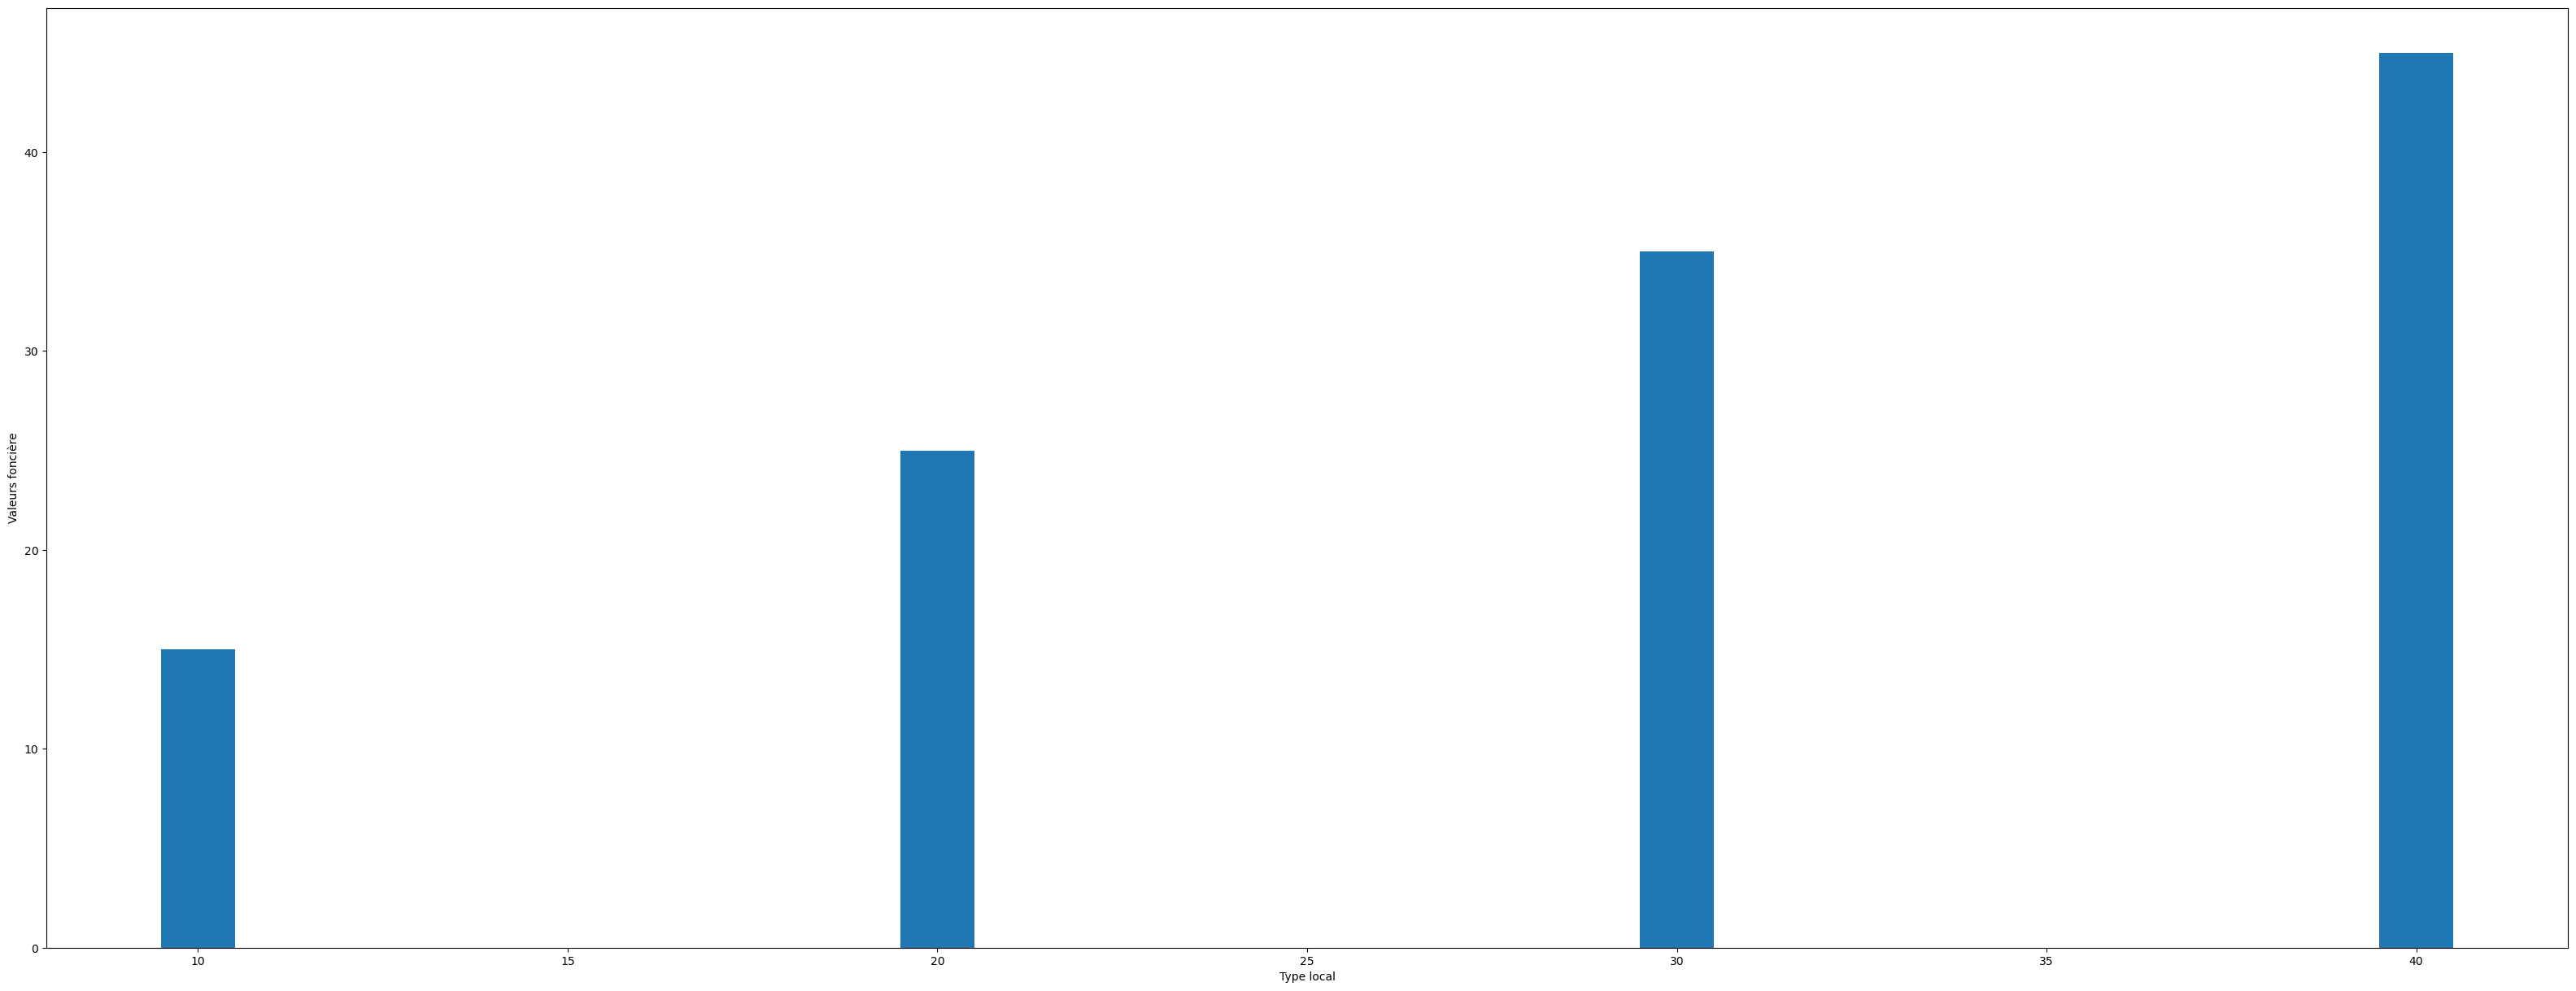

In [15]:

pomme = [10, 20, 30, 40]
fraise = [15, 25, 35, 45]
plt.figure(figsize=[40,15])
plt.bar(pomme, fraise, width=1, label="Type local")
#plt.bar(df_rv['Type local'], df_rv['Valeur fonciere'], width=0.5, label="Type local")
plt.ylabel('Valeurs foncière')
plt.xlabel('Type local')
plt.legend
plt.show

Analyse the price in function of the area

In [17]:
#Creation of histogram in functionof the surface of the building
print(df_rv.shape)
'''plt.figure(figsize=[30,10])
plt.bar(df_rv['Surface reelle bati'], df_rv['Valeur fonciere'], width=0.5, label="Surface réelle du batiment")
plt.ylabel('Valeurs foncière')
plt.xlabel('Surface reelle bati')
plt.legend
plt.show'''

(17810875, 15)


'plt.figure(figsize=[30,10])\nplt.bar(df_rv[\'Surface reelle bati\'], df_rv[\'Valeur fonciere\'], width=0.5, label="Surface réelle du batiment")\nplt.ylabel(\'Valeurs foncière\')\nplt.xlabel(\'Surface reelle bati\')\nplt.legend\nplt.show'

In [ ]:
#Creation of histogram in function of the surface of the area
'''plt.figure(figsize=[30,10])
plt.bar(df_rv['Surface terrain'], df_rv['Valeur fonciere'], width=0.5, label="Surface terrain")
plt.ylabel('Valeurs foncière')
plt.xlabel('Surface terrain')
plt.legend
plt.show'''

## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Heatmap of correlations between variables.
- Scatter plots to visualize relationships between certain variables, such as built area and property value.

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Summarize significant relationships between variables that impact property values.
- Identify key factors to monitor when predicting property values.

Recommendations:
- Investment advice on what factors to prioritize when evaluating properties (e.g., emphasis on surface area or location).
- Suggestions for investing in areas where the correlation factors are favorable.